<a href="https://colab.research.google.com/github/AndersonBarbosa10/projetos_data_science/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, abordaremos o problema das fraudes em cartões de crédito, uma das princiais preocupações das instiuições financeiras. E diante do cenário de pandemia, com aumento das compras on-line, golpes virtuais se tornam ainda mais comum. De acordo com pesquisas recentes, o roubo de identidade on-line, conhecido como *pushing*, é o principal esquema de cibercrime em to mundo. No Brasil, o furto de cartões de crédito e cobranças fraudulentas correspondem a 26% das reclamações.

Com o grande crescimento das comercializações pela internet, os cartões de crédito virtuais passaram a ser cada vez mais utilizados. pois reduzem o risco de clonagem em relação aos cartões físicos, mas, infelizmente, não são capazes de evitá-lo.

<p align=center>
<img src="https://image.freepik.com/free-vector/people-holding-credit-cards-illustration_53876-6375.jpg" width="60%"></p>

A detecção das fraudes envolvendo cartões de crédito passam a ser de grande importânica uma vez que a sua não-detecção acaretará em prejuízos relevantes para o consumidor e para a instituição financeira.

Outro fator a ser apreciado é a quantidade de falsos positivos, ou seja, quando você tenta fazer uma compra e tem seu cartão bloqueado preventivamente, podendo gerar estresse e constrangimento.

Diante disso, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning com uma pequena melhoria em relação aos anteriores já pode representar uma economia de milhões de Reais. E esse é grande o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados utilizados neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de apenas dois dias, onde foram classificadas 492 fraudes em meio aproximadamente 290 mil transações, ou seja, um conjunto de dados extremamente desbalanceado, como será possível observar.

Um detalhe importantes é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://image.freepik.com/free-vector/credit-cards-coins-shoppin-bags_23-2147671684.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA é uma técnica de análise multivariada que pode ser usada para analisar inter-relações entre um grande número de variáveis e explicar essas variáveis em termos de suas dimensões inerentes (Componentes).

O objetivo é encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


sns.set_style("white")

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


#tamanho do dataframe
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

Entradas:	284807
Variáveis:	31


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, iniciaremos a análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

## Análise Exploratória

Ao analisar as 05 primeiras entradas, podemos observar que:

* A transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores númericos;

* As variáveis `Time` `Amount` mativeram seus valores iniciais;

* A coluna `Class` é variável alvo, em que:
  * **0** - Transação normal; e
  * **1** - Transação fraudulente.

In [ ]:
# verificar as 05 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Por meio da função `describe` verificamos o resumo estatístico, no qual podemos observar que as variáveis relativas aos componentes principais (PCA) não há nenhuma discrepância aparente, assim como na coluna `Time`.

Já na coluna `Amount`, observamos que sua média é 88, mediana 22, desvio padrão 250 e o maior valor é 2.591, ou seja, apresentando um indício de termos `outlier`.


In [ ]:
# resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Podemos observar abaixo que o Dataframe não apresenta valores ausentes.

In [ ]:
# verificar valores ausentes
(df.isnull().sum()).sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

Com a função `dtypes`, verificamos que todas as variávies são do tipo `float64`, exceto a variável alvo, que é do tipo `int64`.

In [ ]:
# verificar os tipos das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Podemos perceber abaixo, o quanto nosso Dataframe está desbalanceado, onde a quantidade de transações normais representa 284.315 e as transações fraudulentas representam apenas 492.

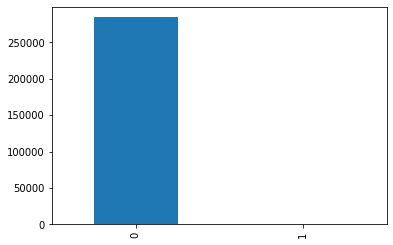

In [ ]:
# plotar gráfico de barras da variável Class
df.Class.value_counts().plot(kind='bar');

In [ ]:
# quantidade dos valores da variável Class
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Para comparar as distribuçõe das duas classes (0 e 1) em relação às variáves `Time` e `Amount` plotamos os histrogramas, porém não foi identificada nenhuma informação relevante em relação à coluna `Time`, e referente a coluna `Amount`, percebemos que seu pico é concentrado no lado esquerdo, e os dados fora de padrão decrescem para o lado oposto.

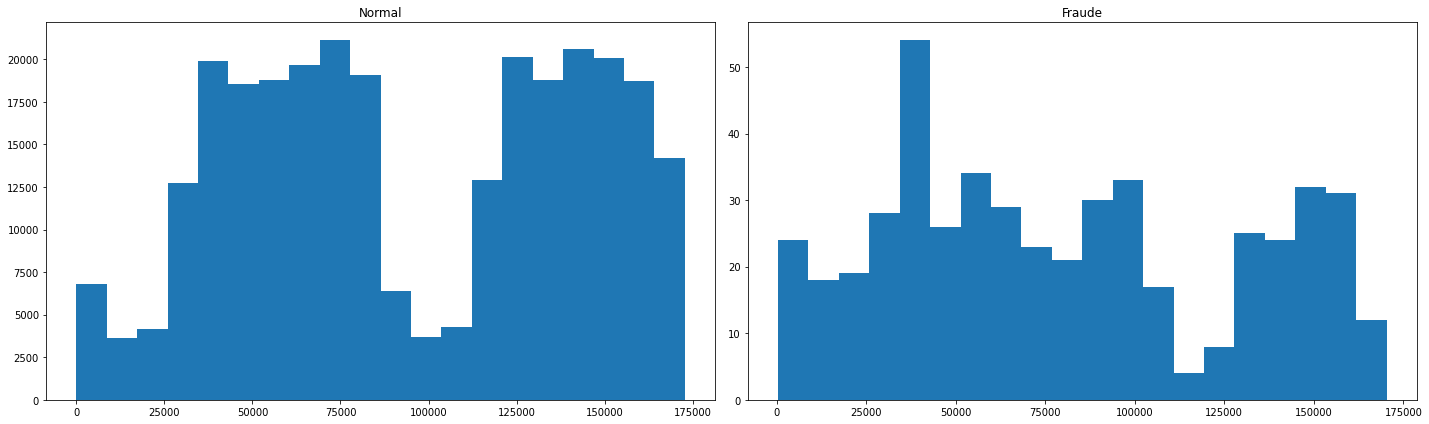

In [ ]:
# histograma da variável time
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].hist(df.Time[df.Class == 0], bins=20)
ax[0].set_title("Normal")

ax[1].hist(df.Time[df.Class == 1], bins=20)
ax[1].set_title("Fraude")

plt.tight_layout()

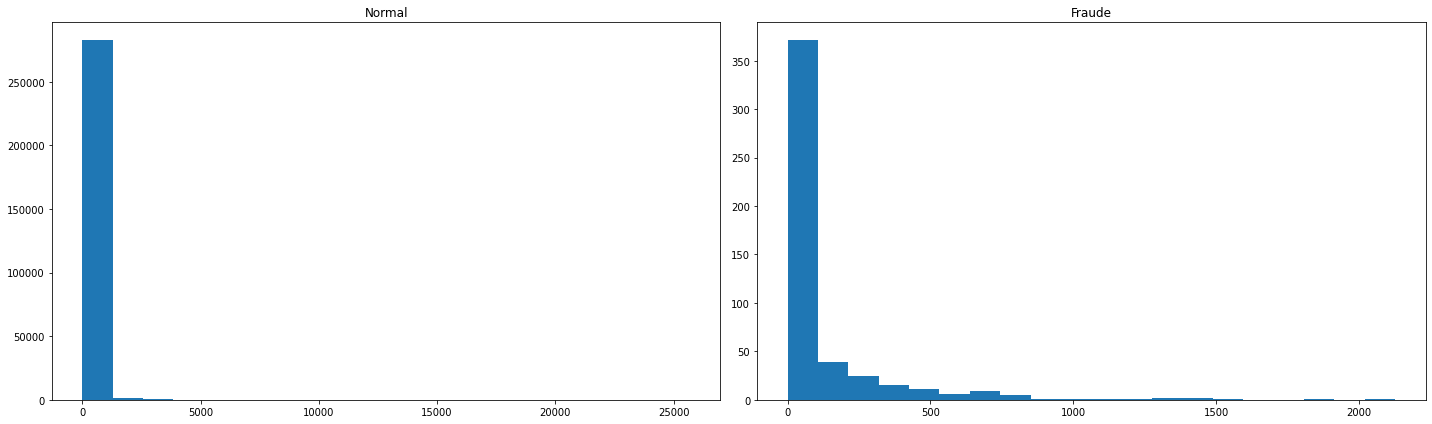

In [ ]:
# histograma da variável Amount
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax[0].hist(df.Amount[df.Class == 0], bins=20)
ax[0].set_title("Normal")

ax[1].hist(df.Amount[df.Class == 1], bins=20)
ax[1].set_title('Fraude')

plt.tight_layout()

Plotamos os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão `Amount`. Percebemos que para ambas as classes há muitos valores acima do limite superior.

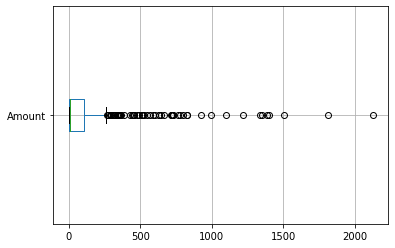

In [ ]:
# plotar um boxplot para a variável Amount quando houve fraude 
fig, ax = plt.subplots()

df.loc[df.Class == 1].boxplot(['Amount'], vert=False, ax=ax)

plt.show()

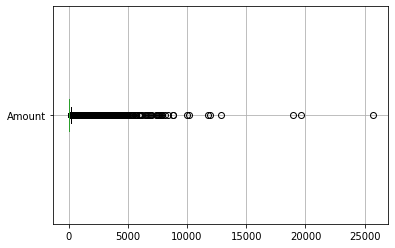

In [ ]:
# plotar um boxplot para a variável Amount quando não houve fraude 
fig, ax = plt.subplots()

df.loc[df.Class == 0].boxplot(['Amount'], vert=False, ax=ax)

plt.show()

Para verificar a correlação entre as variáveis utilizamos o `heatmap`, e como podemos perceber a matriz não traz nenhuma informação relevante.

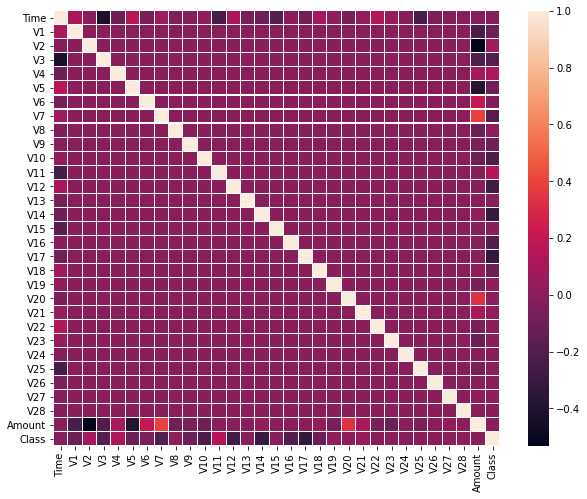

In [ ]:
# analise correlação
correlacao = df.corr()

# matriz de correlação
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(correlacao, annot=False, fmt=".1f", linewidths=.1, ax=ax)

plt.show()

## Preparação dos Dados

Visando utilizarmos os dados para alimentar o modelo de Regressão Logística, iremos prepara-los, conforme abaixo:

* Normalizar as variáveis `Time` e `Amount`, que estão em outra ordem de grandeza.
* Dividir os dados entre treino e teste
* Balancear o conjunto de dados

Considerando que as colunas possuem *outliers*, foi unsada a padronização dos dados por meio da classe `StandardScaler`.


In [ ]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras linhas 
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Antes de balancearmos o conjunto de dados, iremos dividir os dados entre treino e teste. E para garantir que os dados de treino e teste tenham a mesma quantidade de classes proporcionamente, utilizamos a função `stratify=True`.

In [ ]:
# separar variáveis enntre X e y
X = df_clean.drop(['Class'], axis=1)
y = df_clean['Class']


# dividir dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Após dividirmos o conjunto de dados em treino e teste, utilizamos a biblioteca `imblearn` para aplicar o balanceamento de dados. A opção usada foi a *Under-sampling*, para preservar a classe minoritária.

Com isso, podemos perceber que não há mais aquela discrepância observada inicialmente.

1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


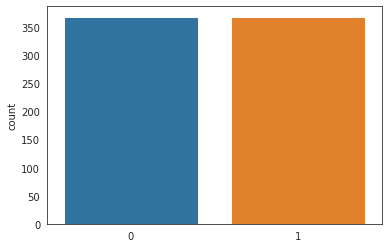

In [ ]:
# usando técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

## Modelo de Machine Learning

Após uma análise exploratória e a prepração dos dados, iremos construir um classificador usando a Regressão Logística.

Inicialmente instanciamos o modelo, e o mesmo será treinado em cima dos dados em `X-rus` e `y_ru`, e na sequência serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar paramentros
model = LogisticRegression()

# fit do modelo
model.fit(X_rus, y_rus)

# fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

## Avaliar o desempenho do modelo

Depois do modelo treinado e as previsões realizadas, partiremos para a avaliação do desempenho.

Conforme relatório abaixo, podemos perceber que o modelo tem uma acurácia de 97%, porém a proporção das identificações positivas que foram corretas é apenas 6% e a proporção de positivos que foram encontrados corretamentes representa 89%, conforme *precision* e *recall*, respectivamente.


In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



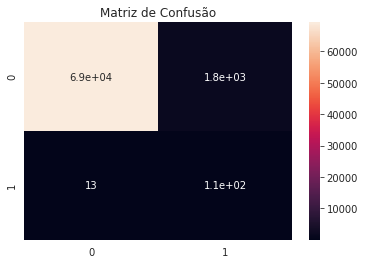

In [ ]:
# plotar matriz de confusão 
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")

plt.show()

## Conclusão

O projeto buscou demonstrar o potencial do uso de Machine Learning na detecção de fraudes em cartões de crédito. Trata-se de uma análise relativamente simples e várias outras análises poderão ser realizadas na prevenção desse tipo de fraude, de modo a minimizar os prejuízos tanto da instituição financeira quanto dos usuários.